# Titanic Data Exploration Project

### Hi, my name is Hernando Andrianto Willy Ren and I would like to perform data exploration on titanic passenger survival data

Titanic Data Contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic.

First, here's the data dictionary of the set

### Data Dictionary

Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton


Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

# Research Question :

# 1. What factors made people more likely to survive?

### Initial Analysis on Dataset using Data Dictionary

first, as we explore the data dictionary, there are numbers of interesting variable that may potentially affect survivability rate of a passenger. From my perspective, it can be :

1. Ticket Class  - because it is a proxy of socioeconomic status, as the class higher, the survivability might get highe because first class may get better priority (but have to validify this hypothesis)

2. Sex- women might get better priority 

3. number of siblings, spouses, parents or children aboard in titanic may also have effect on the survivability

4. Passenger fare may become a proxy of socioeconomic status, but this is a bit redundant with Ticket class variable, but we will check on it either way

5. Cabin number indicates the location of cabin, there's also might affect the survibality of the passenger


as for ticket number and port of embarkation, i don't think it will have any impact on the analysis of sruvivability , we will only take a look slighty on this variable

# Okay! let's do this !

## Step 1. IMPORTING DATA

In [ ]:
# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

####
import warnings
warnings.filterwarnings('ignore')

# Going to use these 5 base models for the stacking
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.cross_validation import KFold;

In [ ]:
gender_submission = pd.read_csv('gender_submission.csv')
ti_train_df = pd.read_csv('train.csv')
ti_test_df = pd.read_csv('test.csv')

## Step 2. Data Exploration

### 2.1 INITIAL EXPLORATION

In [3]:
ti_test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [4]:
ti_train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
gender_submission.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


As we can see in this set we can see three dataset, which is ti_train_df, ti_test_df, and gender submission

Overview

training set (train.csv)
test set (test.csv)
The training set should be used to build our machine learning models. For the training set, we have the outcome (also known as the “ground truth”) for each passenger. our model will be based on “features” like passengers’ gender and class. 

Test set (test.csv)
The test set should be used to see how well our model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

### basically for data exploration we are going to use the train set, which is ti_train_df

In [6]:
ti_train_df.shape
#it has 891 record, and 12 variables 

(891, 12)

In [7]:
ti_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110f6b7f0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11134f208>]], dtype=object)

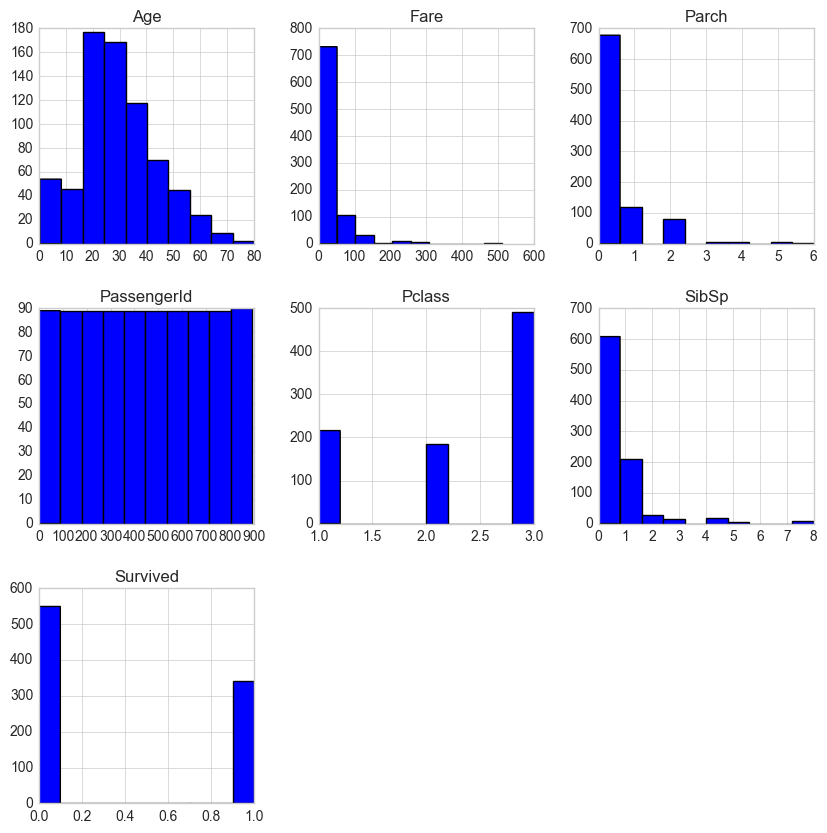

In [8]:
ti_train_df.hist(bins=10,figsize = (10,10))

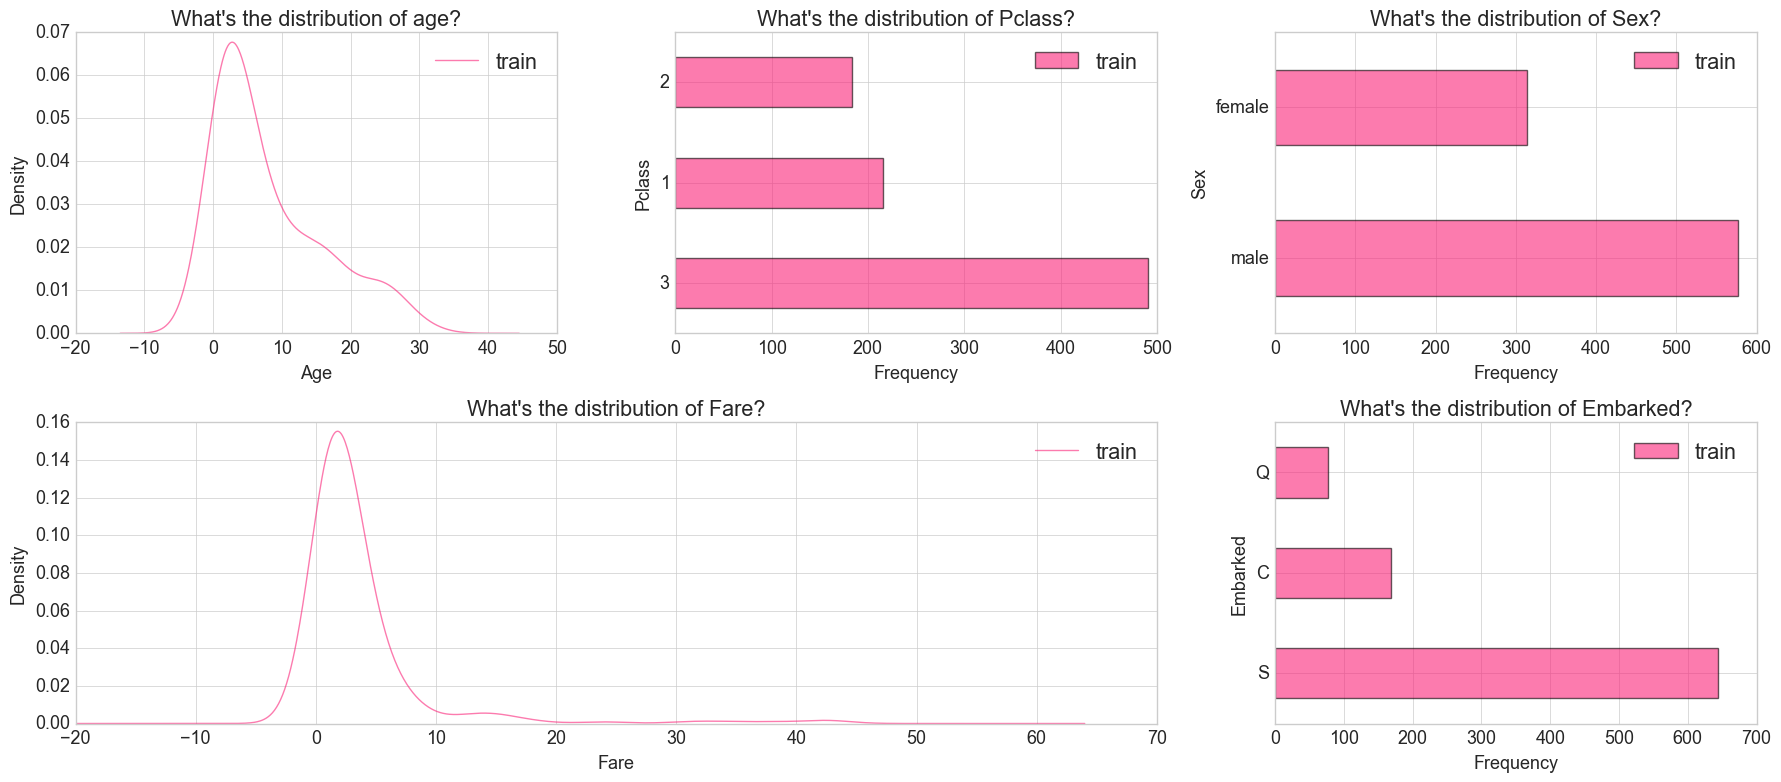

In [9]:
plt.rc('font', size=13)
fig = plt.figure(figsize=(18, 8))
alpha = 0.6

ax1 = plt.subplot2grid((2,3), (0,0))
ti_train_df.Age.value_counts().plot(kind='kde', color='#FA2379', label='train', alpha=alpha)
ax1.set_xlabel('Age')
ax1.set_title("What's the distribution of age?" )
plt.legend(loc='best')

ax2 = plt.subplot2grid((2,3), (0,1))
ti_train_df.Pclass.value_counts().plot(kind='barh', color='#FA2379', label='train', alpha=alpha)
ax2.set_ylabel('Pclass')
ax2.set_xlabel('Frequency')
ax2.set_title("What's the distribution of Pclass?" )
plt.legend(loc='best')

ax3 = plt.subplot2grid((2,3), (0,2))
ti_train_df.Sex.value_counts().plot(kind='barh', color='#FA2379', label='train', alpha=alpha)
ax3.set_ylabel('Sex')
ax3.set_xlabel('Frequency')
ax3.set_title("What's the distribution of Sex?" )
plt.legend(loc='best')

ax4 = plt.subplot2grid((2,3), (1,0), colspan=2)
ti_train_df.Fare.value_counts().plot(kind='kde', color='#FA2379', label='train', alpha=alpha)
ax4.set_xlabel('Fare')
ax4.set_title("What's the distribution of Fare?" )
plt.legend(loc='best')

ax5 = plt.subplot2grid((2,3), (1,2))
ti_train_df.Embarked.value_counts().plot(kind='barh', color='#FA2379', label='train', alpha=alpha)
ax5.set_ylabel('Embarked')
ax5.set_xlabel('Frequency')
ax5.set_title("What's the distribution of Embarked?" )
plt.legend(loc='best')
plt.tight_layout()

These charts the histogram for all Variables. This will give us the feeling and understanding on how vary the variables are. For example we can see the distribution of the data majority in class 3,male, and embarked from S, and . this will be used as reference for further analysis.

## 2.2. Exploring Missing Values

we can see from above that Age, Cabin & Embarked have missing values

In [10]:
ti_train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
null_columns=ti_train_df.columns[ti_train_df.isnull().any()]
null_columns

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

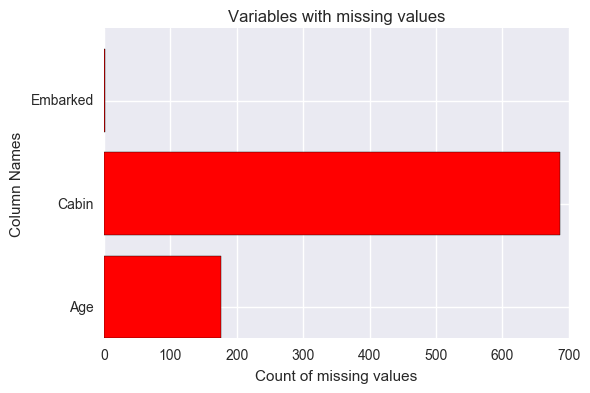

In [12]:
sns.set(font_scale=1)
plt.style.use = 'default'
labels = []
values = []


for col in null_columns:
    labels.append(col)
    values.append(ti_train_df[col].isnull().sum())

ind = np.arange(len(labels))
width=0.6
fig, ax = plt.subplots(figsize=(6,4))
rects = ax.barh(ind, np.array(values), color='red')
ax.set_yticks(ind+((width)/2.))

ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_ylabel("Column Names")
ax.set_title("Variables with missing values");

The chart above shows the number of missing values in the dataset, we found that in training set we have missing values in column 'Embarked', 'Cabin', and  'Age' with amount of around 2, almost 700, and almost 200 missing values respectively. 

we may want to check further on how much in percentage the missing values are.

In [13]:
ti_train_df.isnull().sum() /891

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

#### As we can see that the missing values for Age is 19.86%, Cabin 77% , and embarked 0.2%. 

- For Age, we may want to do imputation process since the portion is substantial but i think might be one of the important factor on survivability, so its not good to drop the column. 
there are several ways to input the Age, which is using the most common age, the mean age, or we can also use machine learning to predict the age for the certain person.
In this case I will perform Random Forest to predict missing ages

- For Cabin, majority of the records are missing values, so I  want to drop the cabin later on. But I will keep it for a while to analyze was cabin location actually affect the survivability by analyzing only the passenger that have cabin records. 

- For embarked it has only 2 missing values, we can fill this by imputing the common value of Embarked.

### 2.3 Survival By Sex

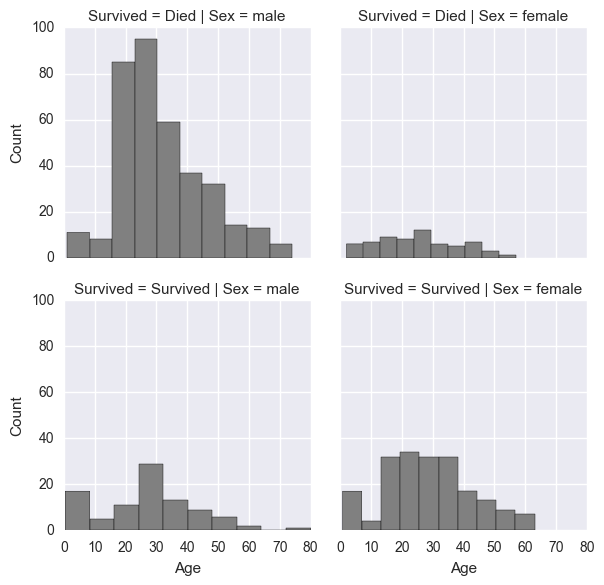

In [14]:
ti_train_df['Survived'].replace({0:'Died', 1:'Survived'}, inplace=True)
g = sns.FacetGrid(ti_train_df, col="Sex", row="Survived")
g.map(plt.hist, "Age",color="grey")
g.set_axis_labels("Age", "Count");

we can see here that actually female higher survival rate compared  by men. The proportion of female who survived is larger that female who did not survive. 
We can also see age less than 10, then men age around 20-30, women 20-40 also have higher rate of survivability


### 2.4 Survival By Age

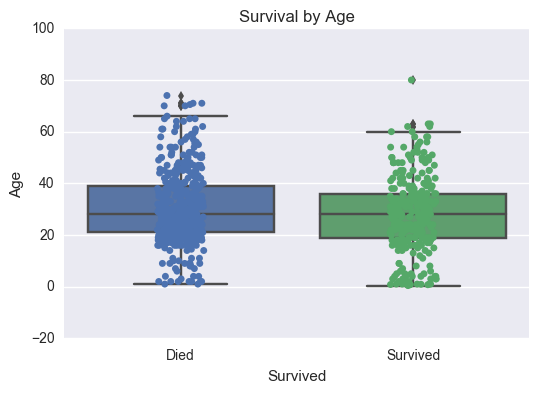

In [15]:
ax = sns.boxplot(x="Survived", y="Age", 
                data=ti_train_df)
ax = sns.stripplot(x="Survived", y="Age",
                   data=ti_train_df, jitter=True,
                   edgecolor="gray")
plt.title("Survival by Age",fontsize=12);

We can see here that females are more likely to survive compared by males, and most of the survived males are the one who are in productive age range 25-30 , and as for female the distribution arequite even deom 15 to 40, then the survival number drops after age 40, and below 20

### 2.5 Explore more...

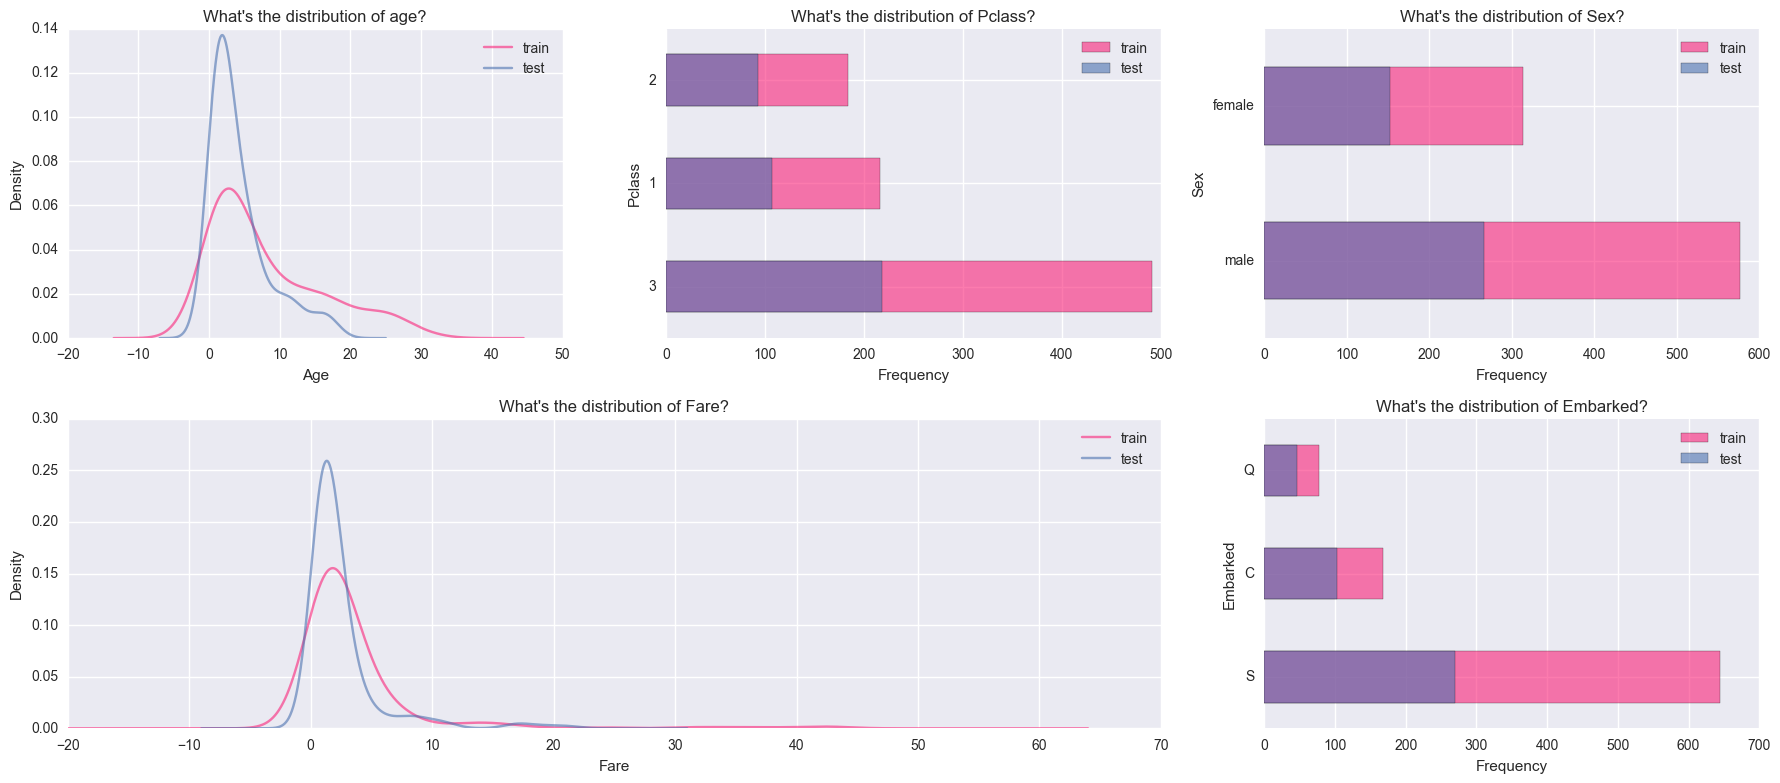

In [16]:
plt.rc('font', size=13)
fig = plt.figure(figsize=(18, 8))
alpha = 0.6

ax1 = plt.subplot2grid((2,3), (0,0))
ti_train_df.Age.value_counts().plot(kind='kde', color='#FA2379', label='train', alpha=alpha)
ti_test_df.Age.value_counts().plot(kind='kde', label='test', alpha=alpha)
ax1.set_xlabel('Age')
ax1.set_title("What's the distribution of age?" )
plt.legend(loc='best')

ax2 = plt.subplot2grid((2,3), (0,1))
ti_train_df.Pclass.value_counts().plot(kind='barh', color='#FA2379', label='train', alpha=alpha)
ti_test_df.Pclass.value_counts().plot(kind='barh', label='test', alpha=alpha)
ax2.set_ylabel('Pclass')
ax2.set_xlabel('Frequency')
ax2.set_title("What's the distribution of Pclass?" )
plt.legend(loc='best')

ax3 = plt.subplot2grid((2,3), (0,2))
ti_train_df.Sex.value_counts().plot(kind='barh', color='#FA2379', label='train', alpha=alpha)
ti_test_df.Sex.value_counts().plot(kind='barh', label='test', alpha=alpha)
ax3.set_ylabel('Sex')
ax3.set_xlabel('Frequency')
ax3.set_title("What's the distribution of Sex?" )
plt.legend(loc='best')

ax4 = plt.subplot2grid((2,3), (1,0), colspan=2)
ti_train_df.Fare.value_counts().plot(kind='kde', color='#FA2379', label='train', alpha=alpha)
ti_test_df.Fare.value_counts().plot(kind='kde', label='test', alpha=alpha)
ax4.set_xlabel('Fare')
ax4.set_title("What's the distribution of Fare?" )
plt.legend(loc='best')

ax5 = plt.subplot2grid((2,3), (1,2))
ti_train_df.Embarked.value_counts().plot(kind='barh', color='#FA2379', label='train', alpha=alpha)
ti_test_df.Embarked.value_counts().plot(kind='barh', label='test', alpha=alpha)
ax5.set_ylabel('Embarked')
ax5.set_xlabel('Frequency')
ax5.set_title("What's the distribution of Embarked?" )
plt.legend(loc='best')
plt.tight_layout()

This shows the distribution of the test set and train set, as we can see there's not much difference from train set and test set distribution.

In [17]:
ti_train_df['Survived'].replace({'Died':0,'Survived':1}, inplace=True)


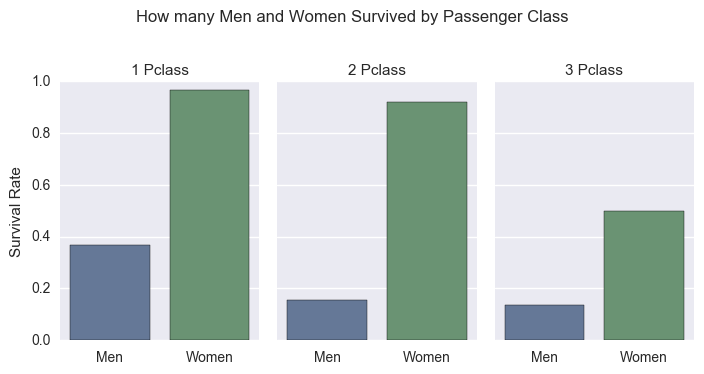

In [18]:
sns.set(font_scale=1)
g = sns.factorplot(x="Sex", y="Survived", col="Pclass",
                    data=ti_train_df, saturation=.5,
                    kind="bar", ci=None, aspect=.6)
(g.set_axis_labels("", "Survival Rate")
    .set_xticklabels(["Men", "Women"])
    .set_titles("{col_name} {col_var}")
    .set(ylim=(0, 1))
    .despine(left=True))  
plt.subplots_adjust(top=0.8)
g.fig.suptitle('How many Men and Women Survived by Passenger Class');

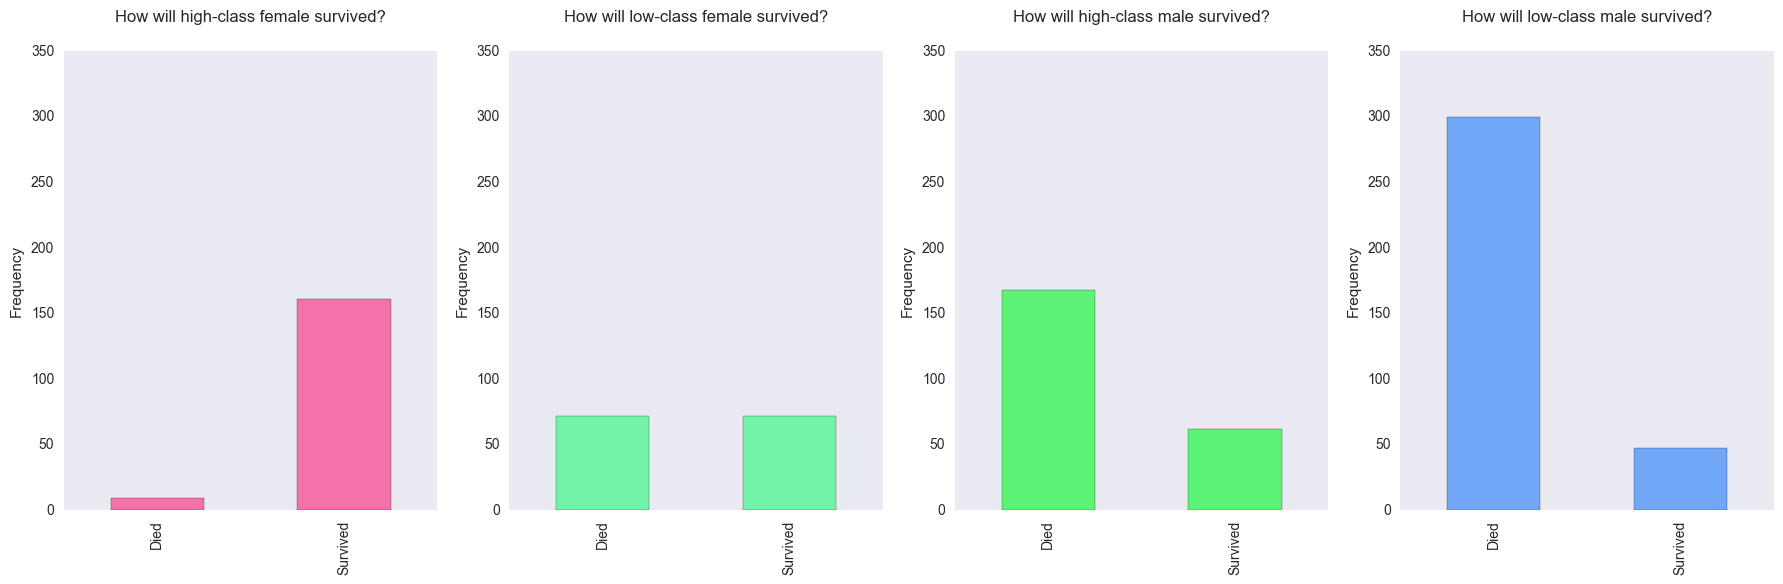

In [19]:


df_male = ti_train_df[ti_train_df.Sex=='male']
df_female = ti_train_df[ti_train_df.Sex=='female']
fig = plt.figure(figsize=(18, 6))

ax1 = plt.subplot2grid((1,4), (0,0))
df_female[df_female.Pclass<3].Survived.value_counts().sort_index().plot(kind='bar', color='#FA2379', alpha=alpha)
ax1.set_ylabel('Frequency')
ax1.set_ylim((0,350))
ax1.set_xticklabels(['Died', 'Survived'])
ax1.set_title("How will high-class female survived?", y=1.05)
plt.grid()

ax2 = plt.subplot2grid((1,4), (0,1))
df_female[df_female.Pclass==3].Survived.value_counts().sort_index().plot(kind='bar', color='#23FA79', alpha=alpha)
ax2.set_ylabel('Frequency')
ax2.set_ylim((0,350))
ax2.set_xticklabels(['Died', 'Survived'])
ax2.set_title("How will low-class female survived?", y=1.05)
plt.grid()

ax3 = plt.subplot2grid((1,4), (0,2))
df_male[df_male.Pclass<3].Survived.value_counts().sort_index().plot(kind='bar', color='#00FA23', alpha=alpha)
ax3.set_ylabel('Frequency')
ax3.set_ylim((0,350))
ax3.set_xticklabels(['Died', 'Survived'])
ax3.set_title("How will high-class male survived?", y=1.05)
plt.grid()

ax4 = plt.subplot2grid((1,4), (0,3))
df_male[df_male.Pclass==3].Survived.value_counts().sort_index().plot(kind='bar', color='#2379FA', alpha=alpha)
ax4.set_ylabel('Frequency')
ax4.set_ylim((0,350))
ax4.set_xticklabels(['Died', 'Survived'])
ax4.set_title("How will low-class male survived?", y=1.05)
plt.grid()
plt.tight_layout()

Here we can see good insight that actually High Class female has the highest survivability among all, and most of the low class male did not survive. 

This gives stronger lead that age and class might be a good predictor for survivability.

### 2.6 Embarked 

In [20]:
ti_train_df['Embarked'].replace({'S' : 'Southampton','Q':'Queenstown', 'C':'Cherbough'}, inplace=True)

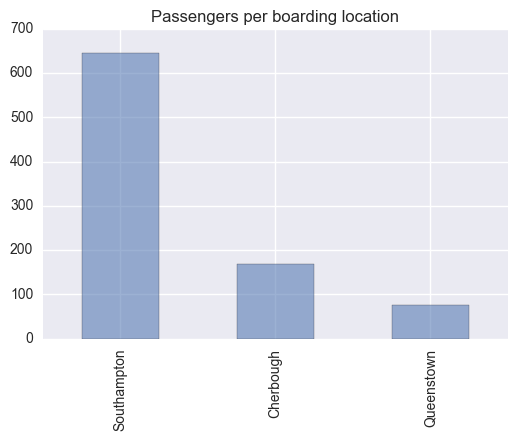

In [21]:
ti_train_df.Embarked.value_counts().plot(kind='bar', alpha=0.55)
plt.title("Passengers per boarding location");

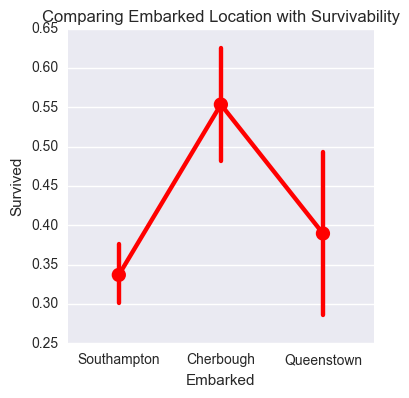

In [22]:
sns.factorplot(x = 'Embarked',y="Survived", data = ti_train_df,color="r")
plt.title('Comparing Embarked Location with Survivability');

Suprisingly, we found that most passenger came embarked from Southampton, but apparently they have low rate of survivability. In contrast, passengers who embarked from Cherbough have higher survivability rate.

### 2.7 Fare

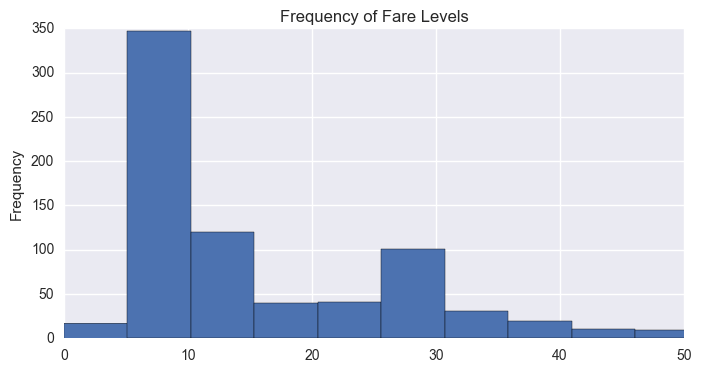

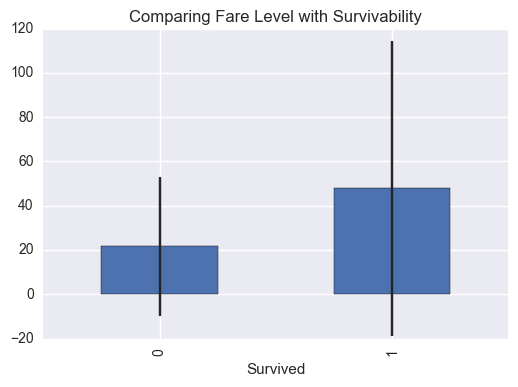

In [23]:
# Fare

# only for test_df, since there is a missing "Fare" values
ti_test_df["Fare"].fillna(ti_test_df["Fare"].median(), inplace=True)

# convert from float to int
ti_train_df['Fare'] = ti_train_df['Fare'].astype(int)
ti_test_df['Fare']    =ti_test_df['Fare'].astype(int)

# get fare for survived & didn't survive passengers 
fare_not_survived = ti_train_df["Fare"][ti_train_df["Survived"] == 0]
fare_survived     = ti_train_df["Fare"][ti_train_df["Survived"] == 1]

# get average and std for fare of survived/not survived passengers
avgerage_fare = DataFrame([fare_not_survived.mean(), fare_survived.mean()])
std_fare      = DataFrame([fare_not_survived.std(), fare_survived.std()])

# plot
ti_train_df['Fare'].plot(kind='hist', figsize=(8,4),bins=100, xlim=(0,50))
plt.title('Frequency of Fare Levels')
avgerage_fare.index.names = std_fare.index.names = ["Survived"]



avgerage_fare.plot(yerr=std_fare,kind='bar',legend=False)
plt.title('Comparing Fare Level with Survivability')

We can't see much differences between fare and survivability. while mostly non-survivor have low fare. The degree of survivor itself have ranging fare between 0-50. This means higher fare passenger have more likelihood to survive (0 means not survived, 1 means survived)

### 2.8 Age

First we will conduct imputation

NameError: name 'axis4' is not defined

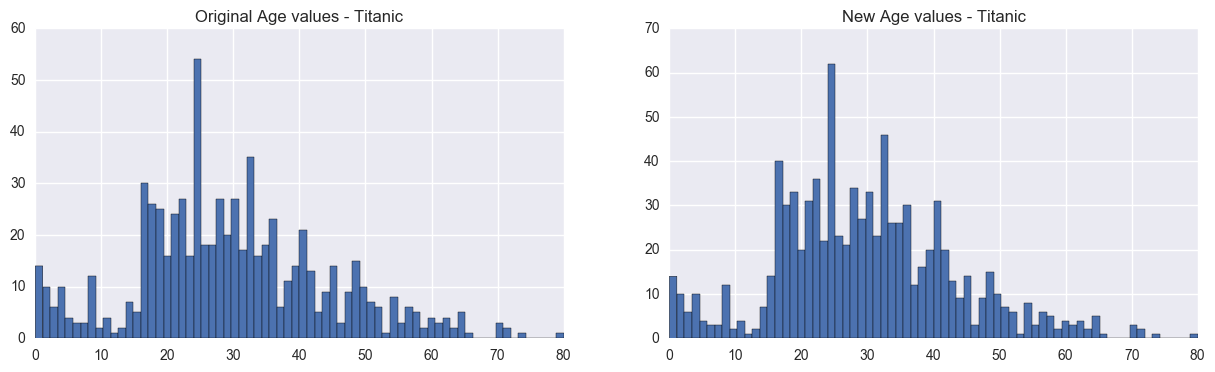

In [24]:
# Age 

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
axis1.set_title('Original Age values - Titanic')
axis2.set_title('New Age values - Titanic')

# axis3.set_title('Original Age values - Test')
# axis4.set_title('New Age values - Test')

# get average, std, and number of NaN values in titanic_df
average_age_titanic   = ti_train_df["Age"].mean()
std_age_titanic       = ti_train_df["Age"].std()
count_nan_age_titanic = ti_train_df["Age"].isnull().sum()

# get average, std, and number of NaN values in test_df
average_age_test   = ti_test_df["Age"].mean()
std_age_test       = ti_test_df["Age"].std()
count_nan_age_test = ti_test_df["Age"].isnull().sum()

# generate random numbers between (mean - std) & (mean + std)
rand_1 = np.random.randint(average_age_titanic - std_age_titanic, average_age_titanic + std_age_titanic, size = count_nan_age_titanic)
rand_2 = np.random.randint(average_age_test - std_age_test, average_age_test + std_age_test, size = count_nan_age_test)

# plot original Age values
# NOTE: drop all null values, and convert to int
ti_train_df['Age'].dropna().astype(int).hist(bins=70, ax=axis1)
# test_df['Age'].dropna().astype(int).hist(bins=70, ax=axis1)

# fill NaN values in Age column with random values generated
ti_train_df["Age"][np.isnan(ti_train_df["Age"])] = rand_1
ti_test_df["Age"][np.isnan(ti_test_df["Age"])] = rand_2

# convert from float to int
ti_train_df['Age'] = ti_train_df['Age'].astype(int)
ti_test_df['Age']    = ti_test_df['Age'].astype(int)
        
# plot new Age Values
ti_train_df['Age'].hist(bins=70, ax=axis2)
ti_test_df['Age'].hist(bins=70, ax=axis4)

### 2.9 Family

[<matplotlib.text.Text at 0x1143c2278>, <matplotlib.text.Text at 0x1152486d8>]

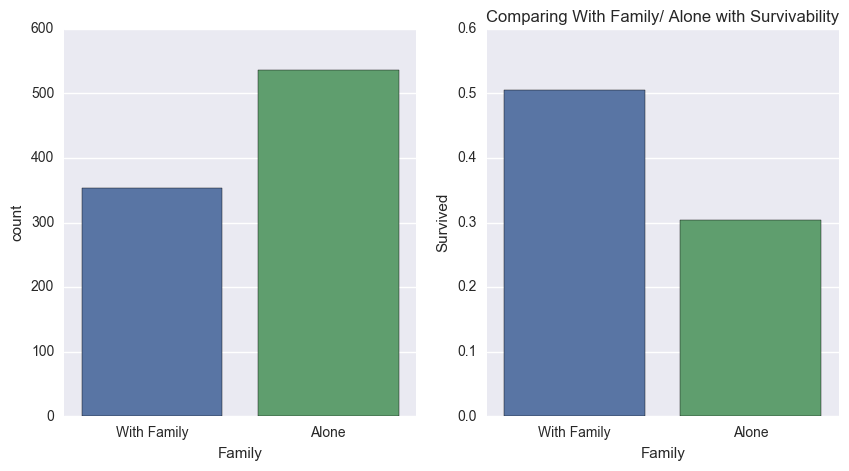

In [25]:

# Family

# Instead of having two columns Parch & SibSp, 
# we can have only one column represent if the passenger had any family member aboard or not,
# Meaning, if having any family member(whether parent, brother, ...etc) will increase chances of Survival or not.
ti_train_df['Family'] =  ti_train_df["Parch"] + ti_train_df["SibSp"]
ti_train_df['Family'].loc[ti_train_df['Family'] > 0] = 1
ti_train_df['Family'].loc[ti_train_df['Family'] == 0] = 0

ti_test_df['Family'] =  ti_test_df["Parch"] + ti_test_df["SibSp"]
ti_test_df['Family'].loc[ti_test_df['Family'] > 0] = 1
ti_test_df['Family'].loc[ti_test_df['Family'] == 0] = 0

# plot
fig, (axis1,axis2) = plt.subplots(1,2,sharex=True,figsize=(10,5))

# sns.factorplot('Family',data=ti_train_df,kind='count',ax=axis1)
sns.countplot(x='Family', data=ti_train_df, order=[1,0], ax=axis1)


# average of survived for those who had/didn't have any family member
family_perc = ti_train_df[["Family", "Survived"]].groupby(['Family'],as_index=False).mean()
sns.barplot(x='Family', y='Survived', data=family_perc, order=[1,0], ax=axis2)
plt.title('Comparing With Family/ Alone with Survivability')
axis1.set_xticklabels(["With Family","Alone"], rotation=0)

if you want to drop family sibs and parch columns, use this:
###### drop Parch & SibSp
ti_train_df = ti_train_df.drop(['SibSp','Parch'], axis=1)
test_df    = test_df.drop(['SibSp','Parch'], axis=1)

### 2.1 PClass 

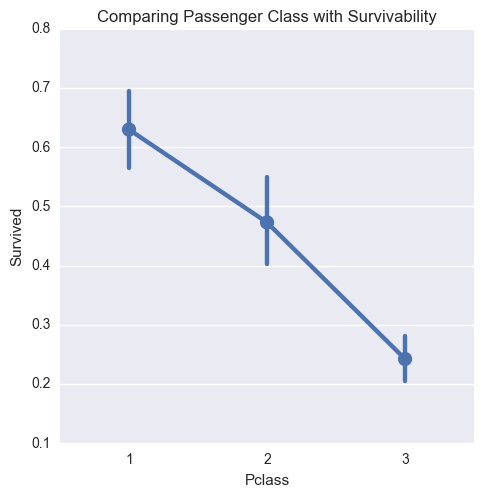

In [26]:
# Pclass

# sns.factorplot('Pclass',data=titanic_df,kind='count',order=[1,2,3])
sns.factorplot('Pclass','Survived',order=[1,2,3], data=ti_train_df,size=5)
plt.title('Comparing Passenger Class with Survivability')

We can see that level 1 passenger class have higher survivability rate compared the other 2 pclass. The asumption is the higher the passenger class, they will get better treatment and more priority of safety.

In [27]:
#correlation of features with target variable
ti_train_df.corr()["Survived"]

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.074070
SibSp         -0.035322
Parch          0.081629
Fare           0.257482
Family         0.203367
Name: Survived, dtype: float64

# Step 3 Data CLEANING

#### Examine how many values missing in BOTH Dataset

In [28]:
ti_train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Family           0
dtype: int64

In [29]:
ti_test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Family           0
dtype: int64

## Missing Values on Embarked

In [30]:
#Lets check which rows have null Embarked column
ti_train_df[ti_train_df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
61,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,NaN,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,NaN,0


In [31]:
ti_train_df['Embarked'].replace({'Southampton':'S','Queenstown':'Q', 'Cherbough':'C'}, inplace=True)

,Fare,Pclass,Embarked
61,80,1,NaN
829,80,1,NaN


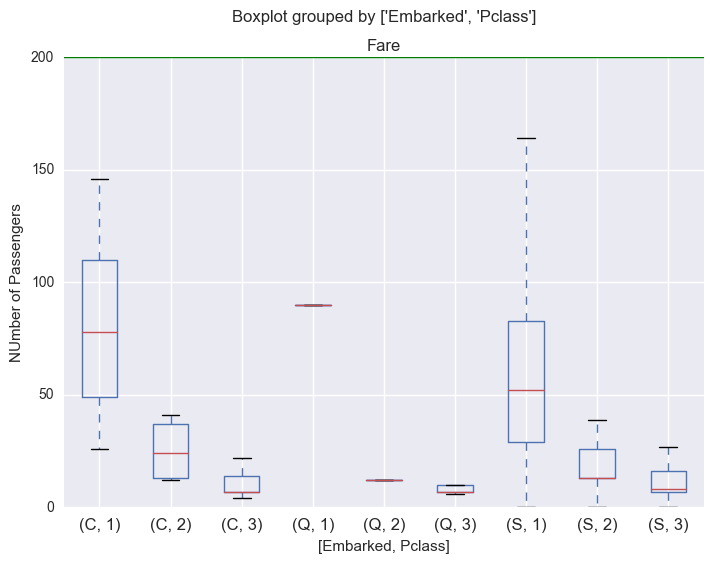

In [32]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax = ti_train_df.boxplot(column='Fare', by=['Embarked','Pclass'], ax=ax)
plt.ylim(0,200)
plt.axhline(y=200, color='green')
plt.ylabel('NUmber of Passengers')
ti_train_df[ti_train_df.Embarked.isnull()][['Fare', 'Pclass', 'Embarked']]


### From the above boxplot, we should replace NA with C because most people who had Pclass 1 and Fare 80 would be Embarked C

In [33]:
_ = ti_train_df.set_value(ti_train_df.Embarked.isnull(), 'Embarked', 'C')

##  Missing Values on Fare

By fixing the values of Embarked and Pclass, we could plot histogram of Fare. And we should use the most common value to replace the NA value of Fare.

,Pclass,Fare,Embarked


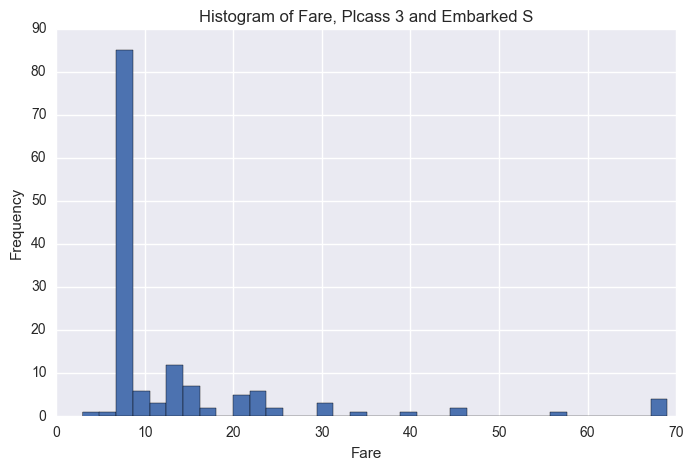

In [34]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
ti_test_df[(ti_test_df.Pclass==3)&(ti_test_df.Embarked=='S')].Fare.hist(bins=35, ax=ax)
ti_test_df[ti_test_df.Fare.isnull()][['Pclass', 'Fare', 'Embarked']]
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Histogram of Fare, Plcass 3 and Embarked S')

ti_test_df[ti_test_df.Fare.isnull()][['Pclass', 'Fare', 'Embarked']]

In [35]:
print ("The top 5 most common value of Fare")
ti_test_df[(ti_test_df.Pclass==3)&(ti_test_df.Embarked=='S')].Fare.value_counts().head()

The top 5 most common value of Fare


7     57
8     28
14     7
9      6
13     5
Name: Fare, dtype: int64

In [36]:
_ = ti_test_df.set_value(ti_test_df.Fare.isnull(), 'Fare', 8.05)

### Age Column
Age seems to be promising feature. So it doesnt make sense to simply fill null values out with median/mean/mode.
We will use Random Forest algorithm to predict ages.

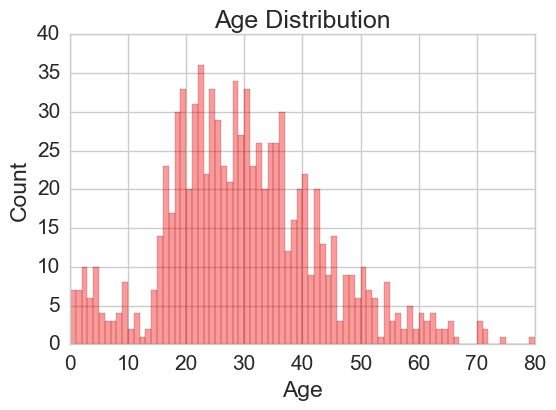

In [37]:
titanic = ti_train_df
titanic_test = ti_test_df

with sns.plotting_context("notebook",font_scale=1.5):
    sns.set_style("whitegrid")
    sns.distplot(titanic["Age"].dropna(),
                 bins=80,
                 kde=False,
                 color="red")
    plt.title("Age Distribution")
    plt.ylabel("Count");

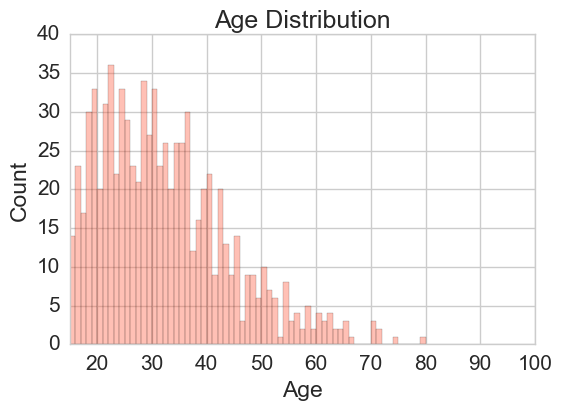

In [38]:
with sns.plotting_context("notebook",font_scale=1.5):
    sns.set_style("whitegrid")
    sns.distplot(titanic["Age"].dropna(),
                 bins=80,
                 kde=False,
                 color="tomato")
    plt.title("Age Distribution")
    plt.ylabel("Count")
    plt.xlim((15,100));

# Missing Values on Cabin

In [39]:
ti_train_df['Cabin'].describe()

count             204
unique            147
top       C23 C25 C27
freq                4
Name: Cabin, dtype: object

In [40]:
ti_train_df['Cabin'].dropna()

1              C85
3             C123
6              E46
10              G6
11            C103
21             D56
23              A6
27     C23 C25 C27
31             B78
52             D33
54             B30
55             C52
61             B28
62             C83
66             F33
75           F G73
88     C23 C25 C27
92             E31
96              A5
97         D10 D12
102            D26
110           C110
118        B58 B60
123           E101
124            D26
128          F E69
136            D47
137           C123
139            B86
148             F2
          ...     
751           E121
759            B77
763        B96 B98
765            D11
772            E77
776            F38
779             B3
781            B20
782             D6
789        B82 B84
796            D17
802        B96 B98
806            A36
809             E8
815           B102
820            B69
823           E121
829            B28
835            E49
839            C47
849            C92
853         

In [41]:
ti_train_df[ti_train_df['Cabin']!= ' ']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,19,0,0,330877,8,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21,NaN,S,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11,NaN,S,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30,NaN,C,1


We will have to deal with Cabin information n feature engineering, but most probably I'll have to drop off the Cabin information later

# Step 4. FEATURE ENGINEERING

## Step 4.1 FE for Exploration Purposes

### 4.1.1. Deck  - where is the cabin located?

In [42]:
#taking out Cabin first letter as Deck, create a column 'Deck'
ti_train_df["Deck"]=ti_train_df.Cabin.str[0]
ti_test_df["Deck"]=ti_test_df.Cabin.str[0]
ti_train_df["Deck"].unique() # 0 is for null values

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

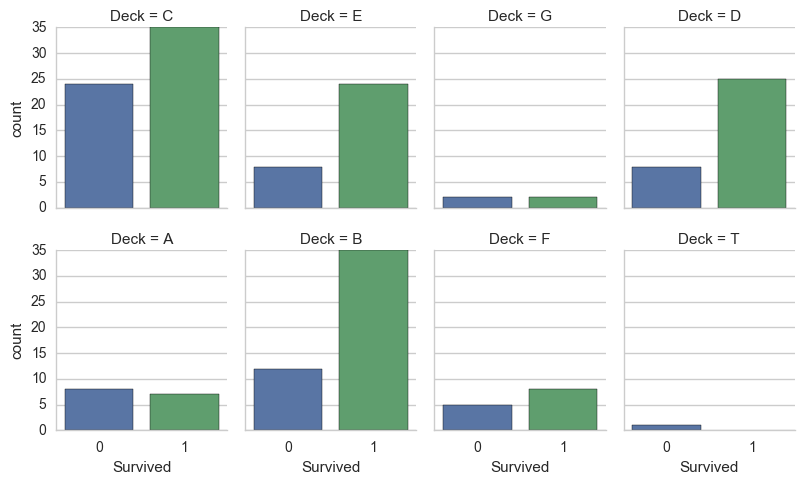

In [43]:
g = sns.factorplot("Survived", col="Deck", col_wrap=4,
                    data=ti_train_df[ti_train_df.Deck.notnull()],
                    kind="count", size=2.5, aspect=.8);

These charts more exploration data that actually passenger who has their deck/ cabin record have averagely more than 50% chance of survived, except of deck T. We can also see high survivarl rate from deck B, C,E& D.

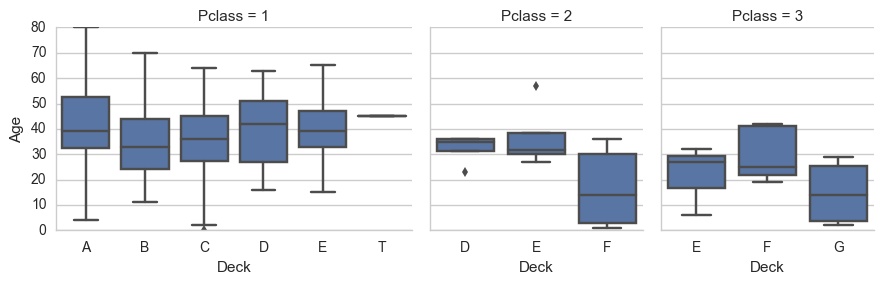

In [44]:
titanic = ti_train_df.assign(Deck=ti_train_df.Deck.astype(object)).sort("Deck")
g = sns.FacetGrid(titanic, col="Pclass", sharex=False,
                  gridspec_kws={"width_ratios": [5, 3, 3]})
g.map(sns.boxplot, "Deck", "Age");

In [45]:
ti_train_df.Deck.fillna('Z', inplace=True)
ti_test_df.Deck.fillna('Z', inplace=True)
ti_train_df["Deck"].unique() # Z is for null values

array(['Z', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

### 4.1.2 How Big is your family

In [46]:
ti_train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7,NaN,S,1,Z
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71,C85,C,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7,NaN,S,0,Z
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53,C123,S,1,C
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8,NaN,S,0,Z


In [47]:
# Create a family size variable including the passenger themselves
ti_train_df["FamilySize"] = ti_train_df["SibSp"] + ti_train_df["Parch"]+1
ti_test_df["FamilySize"] = ti_test_df["SibSp"] +ti_test_df["Parch"]+1
print(ti_train_df["FamilySize"].value_counts())

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64


In [48]:
# Discretize family size
ti_train_df.loc[ti_train_df["FamilySize"] == 1, "FsizeD"] = 'singleton'
ti_train_df.loc[(ti_train_df["FamilySize"] > 1)  &  (ti_train_df["FamilySize"] < 5) , "FsizeD"] = 'small'
ti_train_df.loc[ti_train_df["FamilySize"] >4, "FsizeD"] = 'large'

ti_test_df.loc[ti_test_df["FamilySize"] == 1, "FsizeD"] = 'singleton'
ti_test_df.loc[(ti_test_df["FamilySize"] >1) & (ti_test_df["FamilySize"] <5) , "FsizeD"] = 'small'
ti_test_df.loc[ti_test_df["FamilySize"] >4, "FsizeD"] = 'large'
print(ti_train_df["FsizeD"].unique())
print(ti_train_df["FsizeD"].value_counts())

['small' 'singleton' 'large']
singleton    537
small        292
large         62
Name: FsizeD, dtype: int64


### 4.1.3  Names- Do you have longer names?

In [50]:
titanic = ti_train_df
titanic_test = ti_test_df

[okay, good, short, long]
Categories (4, object): [short < okay < good < long]


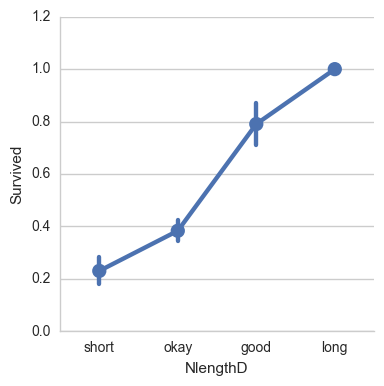

In [51]:
#Create feture for length of name 
# The .apply method generates a new series
titanic["NameLength"] = titanic["Name"].apply(lambda x: len(x))

titanic_test["NameLength"] = titanic_test["Name"].apply(lambda x: len(x))
#print(titanic["NameLength"].value_counts())

bins = [0, 20, 40, 57, 85]
group_names = ['short', 'okay', 'good', 'long']
titanic['NlengthD'] = pd.cut(titanic['NameLength'], bins, labels=group_names)
titanic_test['NlengthD'] = pd.cut(titanic_test['NameLength'], bins, labels=group_names)

sns.factorplot(x="NlengthD", y="Survived", data=titanic)
print(titanic["NlengthD"].unique())

Surprisingly the longer the name means higher survuvability. This be true that the royalty tend to have more titles and family names, which whom might get priority over regular passenger.

### 4.1.4  Names- Titles 

### 4.1.5 Ticket

In [52]:
titanic["Ticket"].tail()

886        211536
887        112053
888    W./C. 6607
889        111369
890        370376
Name: Ticket, dtype: object

In [53]:
titanic["TicketNumber"] = titanic["Ticket"].str.extract('(\d{2,})', expand=True)
titanic["TicketNumber"] = titanic["TicketNumber"].apply(pd.to_numeric)


titanic_test["TicketNumber"] = titanic_test["Ticket"].str.extract('(\d{2,})', expand=True)
titanic_test["TicketNumber"] = titanic_test["TicketNumber"].apply(pd.to_numeric)

In [54]:
#some rows in ticket column dont have numeric value so we got NaN there
titanic[titanic["TicketNumber"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Deck,FamilySize,FsizeD,NameLength,NlengthD,TicketNumber
179,180,0,3,"Leonard, Mr. Lionel",male,36,0,0,LINE,0,NaN,S,0,Z,1,singleton,19,short,NaN
271,272,1,3,"Tornquist, Mr. William Henry",male,25,0,0,LINE,0,NaN,S,0,Z,1,singleton,28,okay,NaN
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19,0,0,LINE,0,NaN,S,0,Z,1,singleton,31,okay,NaN
597,598,0,3,"Johnson, Mr. Alfred",male,49,0,0,LINE,0,NaN,S,0,Z,1,singleton,19,short,NaN
772,773,0,2,"Mack, Mrs. (Mary)",female,57,0,0,S.O./P.P. 3,10,E77,S,0,E,1,singleton,17,short,NaN
841,842,0,2,"Mudd, Mr. Thomas Charles",male,16,0,0,S.O./P.P. 3,10,NaN,S,0,Z,1,singleton,24,okay,NaN


# 4.2 RE Convert Categorical variables into Numerical ones

In [55]:
titanic.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Deck,FamilySize,FsizeD,NameLength,NlengthD,TicketNumber
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7,NaN,S,1,Z,2,small,23,okay,21171.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71,C85,C,1,C,2,small,51,good,17599.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7,NaN,S,0,Z,1,singleton,22,okay,3101282.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53,C123,S,1,C,2,small,44,good,113803.0
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8,NaN,S,0,Z,1,singleton,24,okay,373450.0
5,6,0,3,"Moran, Mr. James",male,19,0,0,330877,8,NaN,Q,0,Z,1,singleton,16,short,330877.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51,E46,S,0,E,1,singleton,23,okay,17463.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21,NaN,S,1,Z,5,large,30,okay,349909.0


In [56]:
ti_train_df['Embarked'].replace({'Southampton':'S','Queenstown':'Q', 'Cherbough':'C'}, inplace=True)

In [57]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

labelEnc=LabelEncoder()

cat_vars=['Sex',"FsizeD","NlengthD",'Deck',]
for col in cat_vars:
    titanic[col]=labelEnc.fit_transform(titanic[col])
    titanic_test[col]=labelEnc.fit_transform(titanic_test[col])

titanic.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Deck,FamilySize,FsizeD,NameLength,NlengthD,TicketNumber
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7,NaN,S,1,8,2,2,23,2,21171.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71,C85,C,1,2,2,2,51,0,17599.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7,NaN,S,0,8,1,1,22,2,3101282.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53,C123,S,1,2,2,2,44,0,113803.0
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8,NaN,S,0,8,1,1,24,2,373450.0
5,6,0,3,"Moran, Mr. James",1,19,0,0,330877,8,NaN,Q,0,8,1,1,16,3,330877.0
6,7,0,1,"McCarthy, Mr. Timothy J",1,54,0,0,17463,51,E46,S,0,4,1,1,23,2,17463.0
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2,3,1,349909,21,NaN,S,1,8,5,0,30,2,349909.0


# Feature Scaling

We can see that Age, Fare are measured on different scales, so we need to do Feature Scaling first before we proceed with predictions.

In [58]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(titanic[['Age', 'Fare']])
titanic[['Age', 'Fare']] = std_scale.transform(titanic[['Age', 'Fare']])


std_scale = preprocessing.StandardScaler().fit(titanic_test[['Age', 'Fare']])
titanic_test[['Age', 'Fare']] = std_scale.transform(titanic_test[['Age', 'Fare']])


# Correlation Analysis

In [59]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Deck,FamilySize,FsizeD,NameLength,NlengthD,TicketNumber
0,1,0,3,"Braund, Mr. Owen Harris",1,-0.560628,1,0,A/5 21171,-0.498948,NaN,S,1,8,2,2,23,2,21171.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.620793,1,0,PC 17599,0.789405,C85,C,1,2,2,2,51,0,17599.0
2,3,1,3,"Heikkinen, Miss. Laina",0,-0.265273,0,0,STON/O2. 3101282,-0.498948,NaN,S,0,8,1,1,22,2,3101282.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.399277,1,0,113803,0.427056,C123,S,1,2,2,2,44,0,113803.0
4,5,0,3,"Allen, Mr. William Henry",1,0.399277,0,0,373450,-0.478817,NaN,S,0,8,1,1,24,2,373450.0


In [60]:
titanic.corr()["Survived"]


PassengerId    -0.005007
Survived        1.000000
Pclass         -0.338481
Sex            -0.543351
Age            -0.074070
SibSp          -0.035322
Parch           0.081629
Fare            0.257482
Family          0.203367
Deck           -0.301116
FamilySize      0.016639
FsizeD          0.283810
NameLength      0.332350
NlengthD       -0.312234
TicketNumber   -0.097302
Name: Survived, dtype: float64

In [61]:
titanic_drop = titanic.drop(['PassengerId','SibSp','Parch', 'Cabin','Name','FamilySize', 'Ticket','TicketNumber','Embarked'], axis=1) 
test_drop = titanic_test.drop(['PassengerId','SibSp','Parch', 'Cabin','Name','FamilySize', 'Ticket','TicketNumber','Embarked'], axis=1)

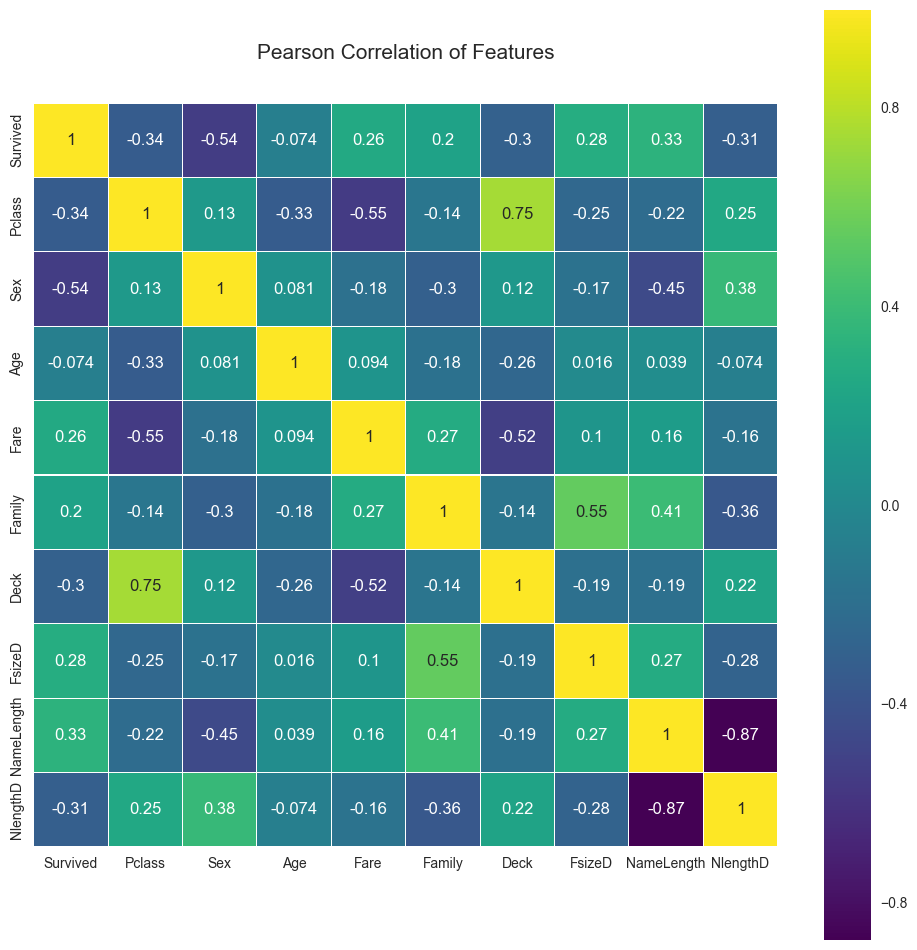

In [62]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(titanic_drop.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [63]:
titanic_drop.head()


,Survived,Pclass,Sex,Age,Fare,Family,Deck,FsizeD,NameLength,NlengthD
0,0,3,1,-0.560628,-0.498948,1,8,2,23,2
1,1,1,0,0.620793,0.789405,1,2,2,51,0
2,1,3,0,-0.265273,-0.498948,0,8,1,22,2
3,1,1,0,0.399277,0.427056,1,2,2,44,0
4,0,3,1,0.399277,-0.478817,0,8,1,24,2


Takeaway from the Plots
One thing that that the Pearson Correlation plot can tell us is that there are not too many features strongly correlated with one another. This is good from a point of view of feeding these features into your learning model because this means that there isn't much redundant or superfluous data in our training set and we are happy that each feature carries with it some unique information. Here are two most correlated features are that Deck and Pclass.  (0.75)

this show actually passenger class and deck code is strongly correlated. another one is name length & namelength D so we can just use one of the variables for each pair


We will conduct preliminary decision tree analysis using
Pclass, Age,Fare, Embarked, Deck, Family size , Name length, Title and ticket number

# Predict Survival

# Ensembling and Stacking Models

Finally after that brief whirlwind detour with regards to feature engineering and formatting, we finally arrive at the meat and gist of the this notebook.
Creating a Stacking ensemble



##  Helpers via Python Classes
Here we invoke the use of Python's classes to help make it more convenient for us. For any newcomers to programming, one normally hears Classes being used in conjunction with Object-Oriented Programming (OOP). In short, a class helps to extend some code/program for creating objects (variables for old-school peeps) as well as to implement functions and methods specific to that class.
In the section of code below, we essentially write a class SklearnHelper that allows one to extend the inbuilt methods (such as train, predict and fit) common to all the Sklearn classifiers. Therefore this cuts out redundancy as won't need to write the same methods five times if we wanted to invoke five different classifiers.

In [64]:
# Some useful parameters which will come in handy later on
ntrain = titanic_drop.shape[0]
ntest = test_drop.shape[0]
SEED = 0 # for reproducibility
NFOLDS = 5 # set folds for out-of-fold prediction
kf = KFold(ntrain, n_folds= NFOLDS, random_state=SEED)

# Class to extend the Sklearn classifier
class SklearnHelper(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_state'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        print(self.clf.fit(x,y).feature_importances_)
    
# Class to extend XGboost classifer

Bear with me for those who already know this but for people who have not created classes or objects in Python before, let me explain what the code given above does. In creating my base classifiers, I will only use the models already present in the Sklearn library and therefore only extend the class for that.
def init : Python standard for invoking the default constructor for the class. This means that when you want to create an object (classifier), you have to give it the parameters of clf (what sklearn classifier you want), seed (random seed) and params (parameters for the classifiers).
The rest of the code are simply methods of the class which simply call the corresponding methods already existing within the sklearn classifiers.

## Out of fold predictions

Now as alluded to above in the introductory section, stacking uses predictions of base classifiers as input for training to a second-level model. However one cannot simply train the base models on the full training data, generate predictions on the full test set and then output these for the second-level training. This runs the risk of your base model predictions already having "seen" the test set and therefore overfitting when feeding these predictions.


In [65]:
def get_oof(clf, x_train, y_train, x_test):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))

    for i, (train_index, test_index) in enumerate(kf):
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]

        clf.train(x_tr, y_tr)

        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i, :] = clf.predict(x_test)

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

## Generating our Base First-Level Models
So now let us prepare five learning models as our first level classification. These models can all be conveniently invoked via the Sklearn library and are listed as follows:

#### Random Forest classifier
#### Extra Trees classifier
#### AdaBoost classifer
#### Gradient Boosting classifer
#### Support Vector Machine

## Parameters
Just a quick summary of the parameters that we will be listing here for completeness,

n_jobs : Number of cores used for the training process. If set to -1, all cores are used.

n_estimators : Number of classification trees in your learning model ( set to 10 per default)

max_depth : Maximum depth of tree, or how much a node should be expanded. Beware if set to too high a number 


would run the risk of overfitting as one would be growing the tree too deep


verbose : Controls whether you want to output any text during the learning process. A value of 0 suppresses all text while a value of 3 outputs the tree learning process at every iteration.
Please check out the full description via the official Sklearn website. There you will find that there are a whole host of other useful parameters that you can play around with.

In [66]:
# Put in our parameters for said classifiers
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 500,
     'warm_start': True, 
     #'max_features': 0.2,
    'max_depth': 6,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'verbose': 0
}

# Extra Trees Parameters
et_params = {
    'n_jobs': -1,
    'n_estimators':500,
    #'max_features': 0.5,
    'max_depth': 8,
    'min_samples_leaf': 2,
    'verbose': 0
}

# AdaBoost parameters
ada_params = {
    'n_estimators': 500,
    'learning_rate' : 0.75
}

# Gradient Boosting parameters
gb_params = {
    'n_estimators': 500,
     #'max_features': 0.2,
    'max_depth': 5,
    'min_samples_leaf': 2,
    'verbose': 0
}

# Support Vector Classifier parameters 
svc_params = {
    'kernel' : 'linear',
    'C' : 0.025
}

Furthermore, since having mentioned about Objects and classes within the OOP framework, let us now create 5 objects that represent our 5 learning models via our Helper Sklearn Class we defined earlier.

In [67]:
# Create 5 objects that represent our 4 models
rf = SklearnHelper(clf=RandomForestClassifier, seed=SEED, params=rf_params)
et = SklearnHelper(clf=ExtraTreesClassifier, seed=SEED, params=et_params)
ada = SklearnHelper(clf=AdaBoostClassifier, seed=SEED, params=ada_params)
gb = SklearnHelper(clf=GradientBoostingClassifier, seed=SEED, params=gb_params)
svc = SklearnHelper(clf=SVC, seed=SEED, params=svc_params)

### Creating NumPy arrays out of our train and test sets

Great. Having prepared our first layer base models as such, we can now ready the training and test test data for input into our classifiers by generating NumPy arrays out of their original dataframes as follows:

In [68]:
# Create Numpy arrays of train, test and target ( Survived) dataframes to feed into our models
train = titanic_drop 
test = test_drop


y_train = train['Survived'].ravel()
train = train.drop(['Survived'], axis=1)
x_train = train.values # Creates an array of the train data
x_test = test.values # Creats an array of the test data


## Output of the Predictions

We now feed the training and test data into our 5 base classifiers and use the Out-of-Fold prediction function we defined earlier to generate our first level predictions. Allow a handful of minutes for the chunk of code below to run.

In [69]:
# Create our OOF train and test predictions. These base results will be used as new features
et_oof_train, et_oof_test = get_oof(et, x_train, y_train, x_test) # Extra Trees
rf_oof_train, rf_oof_test = get_oof(rf,x_train, y_train, x_test) # Random Forest
ada_oof_train, ada_oof_test = get_oof(ada, x_train, y_train, x_test) # AdaBoost 
gb_oof_train, gb_oof_test = get_oof(gb,x_train, y_train, x_test) # Gradient Boost
svc_oof_train, svc_oof_test = get_oof(svc,x_train, y_train, x_test) # Support Vector Classifier

print("Training is complete")

Training is complete


### Feature importances generated from the different classifiers

Now having learned our the first-level classifiers, we can utilise a very nifty feature of the Sklearn models and that is to output the importances of the various features in the training and test sets with one very simple line of code.

As per the Sklearn documentation, most of the classifiers are built in with an attribute which returns feature importances by simply typing in .featureimportances. Therefore we will invoke this very useful attribute via our function earliand plot the feature importances as such

In [70]:
rf_feature = rf.feature_importances(x_train,y_train)
et_feature = et.feature_importances(x_train, y_train)
ada_feature = ada.feature_importances(x_train, y_train)
gb_feature = gb.feature_importances(x_train,y_train)

[ 0.10432983  0.34308605  0.11860145  0.14943221  0.01008972  0.08040772
  0.06840347  0.10018358  0.02546598]
[ 0.13593652  0.4956888   0.05886558  0.04257616  0.02720106  0.07677011
  0.06970418  0.04620357  0.04705401]
[ 0.01   0.016  0.35   0.318  0.008  0.042  0.016  0.232  0.008]
[ 0.03918464  0.03629812  0.34573924  0.22353935  0.01242343  0.03095704
  0.02344784  0.27975366  0.00865668]


So I have not yet figured out how to assign and store the feature importances outright. Therefore I'll print out the values from the code above and then simply copy and paste into Python lists as below (sorry for the lousy hack)

In [73]:
rf_features = [ 0.10432983 , 0.34308605 , 0.11860145 , 0.14943221 , 0.01008972 , 0.08040772
                  ,0.06840347 , 0.10018358 , 0.02546598]
et_features = [ 0.13593652 , 0.4956888  , 0.05886558 , 0.04257616 , 0.02720106 , 0.07677011
                  ,0.06970418 , 0.04620357 , 0.04705401]
ada_features= [ 0.01 ,  0.016 , 0.35  , 0.318 , 0.008 , 0.042 , 0.016 , 0.232 , 0.008]
gb_features =[ 0.03918464 , 0.03629812 , 0.34573924 , 0.22353935 , 0.01242343 , 0.03095704
                  ,0.02344784 , 0.27975366 , 0.00865668]


In [74]:
cols = train.columns.values
# Create a dataframe with features
feature_dataframe = pd.DataFrame( {'features': cols,
     'Random Forest feature importances': rf_features,
     'Extra Trees  feature importances': et_features,
      'AdaBoost feature importances': ada_features,
    'Gradient Boost feature importances': gb_features
    })

Create a dataframe from the lists containing the feature importance data for easy plotting via the Plotly package.


### Interactive feature importances via Plotly scatterplots

I'll use the interactive Plotly package at this juncture to visualise the feature importances values of the different classifiers

In [1]:
# Scatter plot 
trace = go.Scatter(
    y = feature_dataframe['Random Forest feature importances'].values,
    x = feature_dataframe['features'].values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 25,
#       size= feature_dataframe['AdaBoost feature importances'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = feature_dataframe['Random Forest feature importances'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = feature_dataframe['features'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

# Scatter plot 
trace = go.Scatter(
    y = feature_dataframe['Extra Trees  feature importances'].values,
    x = feature_dataframe['features'].values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 25,
#       size= feature_dataframe['AdaBoost feature importances'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = feature_dataframe['Extra Trees  feature importances'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = feature_dataframe['features'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Extra Trees Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

# Scatter plot 
trace = go.Scatter(
    y = feature_dataframe['AdaBoost feature importances'].values,
    x = feature_dataframe['features'].values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 25,
#       size= feature_dataframe['AdaBoost feature importances'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = feature_dataframe['AdaBoost feature importances'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = feature_dataframe['features'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'AdaBoost Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

# Scatter plot 
trace = go.Scatter(
    y = feature_dataframe['Gradient Boost feature importances'].values,
    x = feature_dataframe['features'].values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 25,
#       size= feature_dataframe['AdaBoost feature importances'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = feature_dataframe['Gradient Boost feature importances'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = feature_dataframe['features'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Gradient Boosting Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

NameError: name 'go' is not defined

Now let us calculate the mean of all the feature importances and store it as a new column in the feature importance dataframe

In [76]:
# Create the new column containing the average of values

feature_dataframe['mean'] = feature_dataframe.mean(axis= 1) # axis = 1 computes the mean row-wise
feature_dataframe.head(3)

,AdaBoost feature importances,Extra Trees feature importances,Gradient Boost feature importances,Random Forest feature importances,features,mean
0,0.010,0.135937,0.039185,0.104330,Pclass,0.072363
1,0.016,0.495689,0.036298,0.343086,Sex,0.222768
2,0.350,0.058866,0.345739,0.118601,Age,0.218302


## Plotly Barplot of Average Feature Importances

Having obtained the mean feature importance across all our classifiers, we can plot them into a Plotly bar plot as follows:

In [77]:
y = feature_dataframe['mean'].values
x = feature_dataframe['features'].values
data = [go.Bar(
            x= x,
             y= y,
            width = 0.5,
            marker=dict(
               color = feature_dataframe['mean'].values,
            colorscale='Portland',
            showscale=True,
            reversescale = False
            ),
            opacity=0.6
        )]

layout= go.Layout(
    autosize= True,
    title= 'Barplots of Mean Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='bar-direct-labels')

# CONCLUSION


To Answer the main problem question:

####  What factors made people more likely to survive?

All the analysis above gives summary that the survivability of the passenger of titanic was affected strongly by these following factors:
1. Sex
2. Age
3. Fare
4. Name Length

### 1.Sex  : 
#### We can see that women have higher rate of survivability
### 2.Age  : 
#### We can see that children age less than 10, men age 20-30, and women age 20-40 have higher survival rate than the rest of age bracket in each gender
### 3.Fare  : 
#### We can see that passenger with higher fare have more survivability rate
### 4.Name Length  : 
#### We can see that name with more length have higher survivability rate. This may referred to fact that noble person have longer name due to their titles.




# LIMITATION

In this research, we are faced with limitations such as missing values and other resources limitations.
In order to proceed with analysis proses , we conducted value imputation to variable Embarked with using common variable, we imputed Age variables, which were in substantial amount (around 20%), using random forest technique, and also dropping several variables, for example : Cabin & Deck due to the large amount of missing Data (more than 70% missing data)

Potential improvement can be seen in visualization process and the comprehensiveness of the analysis. We can also be able to predict the survivability in the test set in the future 

The other limitation was the time & resource limitation to preform more professional analysis regarding Titanic Passenger Survivability

Finally, the conclusion can also be improved by predicting the passenger survivability using the test set after making the model in the training set in the future.


### Many Thanks!

## Hernando Andrianto Willy Ren
## hernando.andrianto@yahoo.com
## +61426452310
### Data Analyst
